In [47]:
import pandas as pd
import numpy as np
import seaborn as sns

In [48]:
df = pd.read_csv('../Data/heart.csv')

In [49]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Shape (rows & columns)

In [15]:
df.shape

(918, 12)

### Info (data types, nulls)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### Summary statistics

In [9]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Check missing values

In [10]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

# Univariate Analysis
## Numerical Feature Distributions

### Key things to observe:

age distribution

cholesterol values

maximum heart rate (MaxHR)

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RestingBP'}>,
        <Axes: title={'center': 'Cholesterol'}>],
       [<Axes: title={'center': 'FastingBS'}>,
        <Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'Oldpeak'}>],
       [<Axes: title={'center': 'HeartDisease'}>, <Axes: >, <Axes: >]],
      dtype=object)

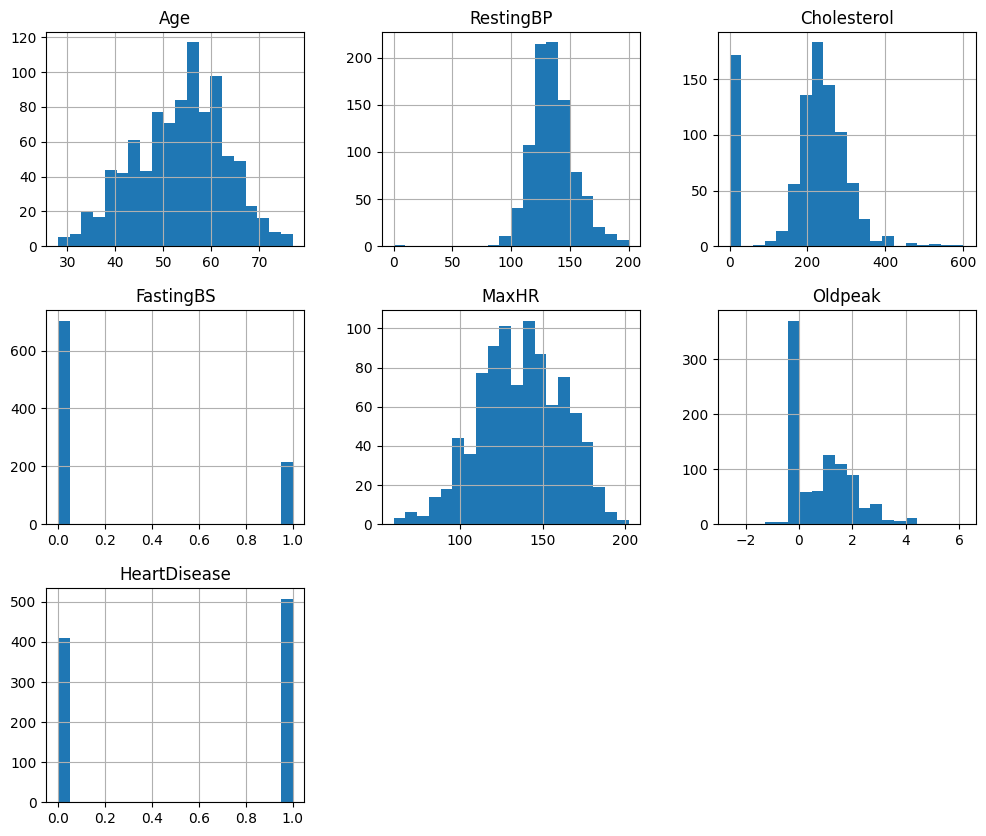

In [22]:
df.hist(figsize= (12, 10), bins = 20)

### Age distribution using seasborn

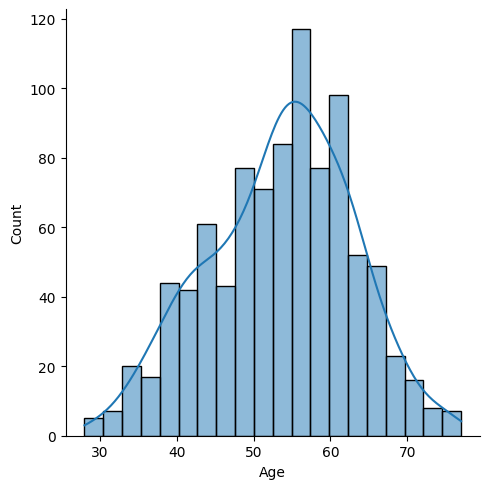

In [21]:
sns.displot(df['Age'], kde = True, bins=20)

C:\Users\jajul\AppData\Local\Temp\ipykernel_10260\4019601524.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], hist = True)


<Axes: xlabel='Age', ylabel='Density'>

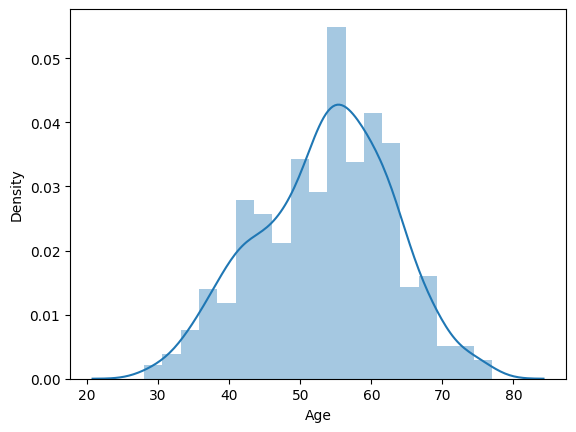

In [29]:
sns.distplot(df['Age'], hist = True)

## Categorical Feature Counts
### Pie charts for categorical data.

<Axes: >

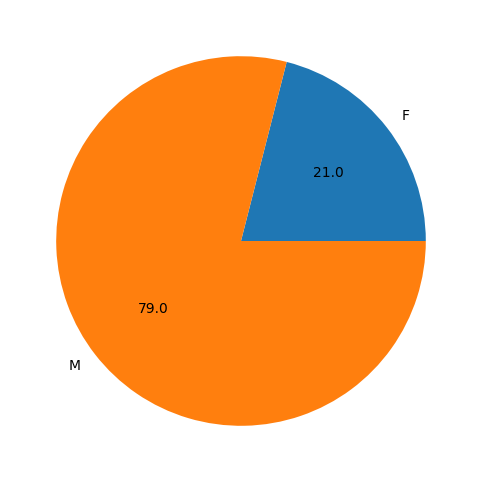

In [33]:
df.groupby('Sex').size().plot(kind = 'pie', autopct = "%0.1f", figsize = (6,6))

<Axes: >

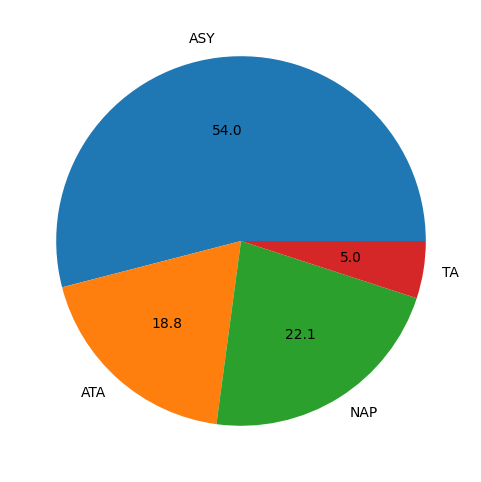

In [34]:
df.groupby('ChestPainType').size().plot(kind = 'pie', autopct = "%0.1f", figsize = (6,6))

<Axes: >

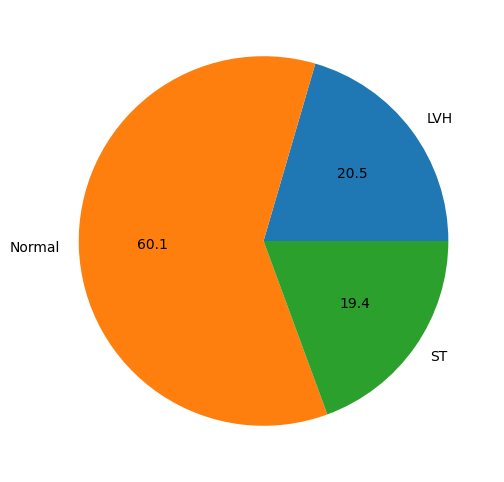

In [35]:
df.groupby('RestingECG').size().plot(kind = 'pie', autopct = "%0.1f", figsize = (6,6))

<Axes: xlabel='Sex', ylabel='count'>

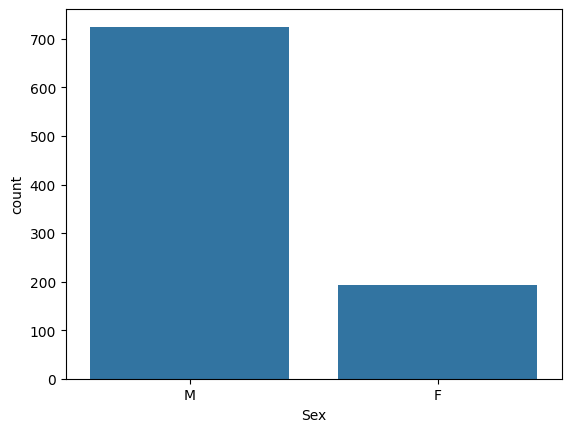

In [36]:
sns.countplot(x = 'Sex', data = df)

<Axes: >

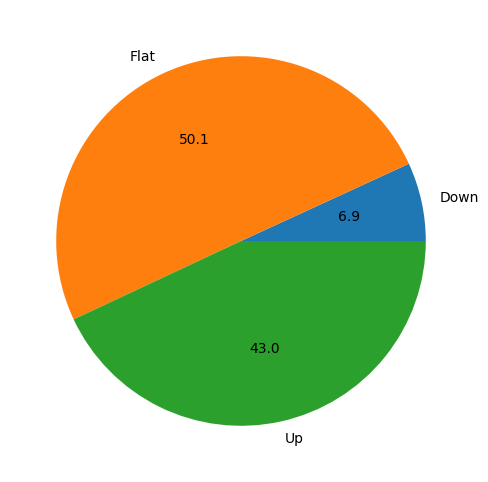

In [37]:
df.groupby('ST_Slope').size().plot(kind = 'pie', autopct = "%0.1f", figsize = (6,6))

### Violin Plot. Helps you analyse more than one thing at a time.

<Axes: xlabel='HeartDisease', ylabel='Sex'>

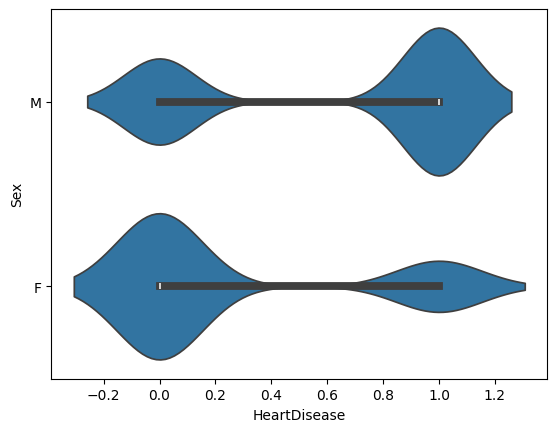

In [42]:
sns.violinplot(y = 'Sex', x = "HeartDisease", data = df)

<Axes: xlabel='HeartDisease', ylabel='Age'>

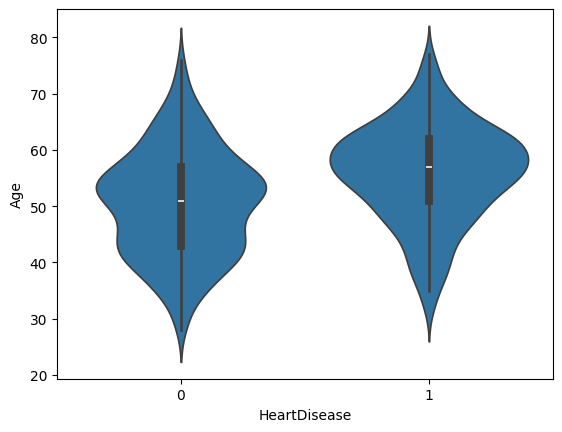

In [43]:
sns.violinplot(y = 'Age', x = "HeartDisease", data = df)

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

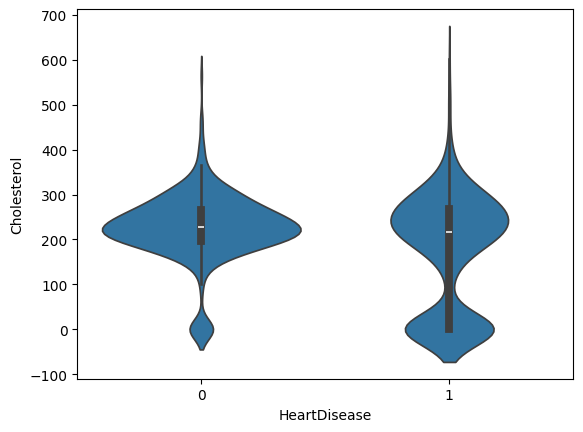

In [44]:
sns.violinplot(y = 'Cholesterol', x = "HeartDisease", data = df)

## Correlation Analysis

In [51]:
df.corr(numeric_only=True)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


<Axes: >

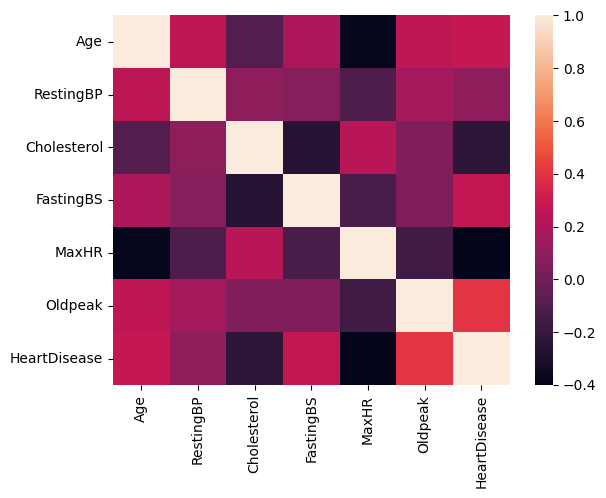

In [53]:
sns.heatmap(df.corr(numeric_only=True))

### Joint plot

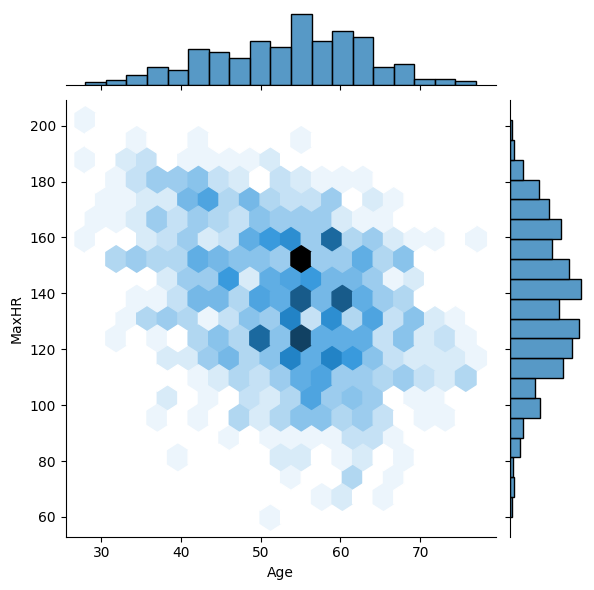

In [58]:
sns.jointplot(x = 'Age', y = 'MaxHR', data = df, kind = 'hex')

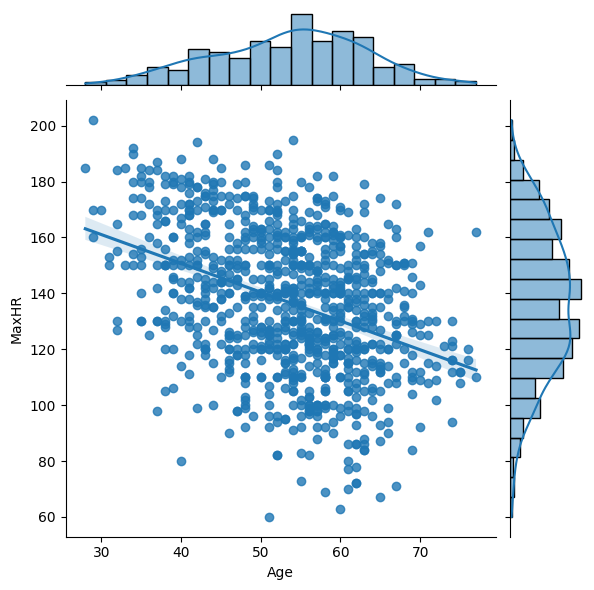

In [59]:
sns.jointplot(x = 'Age', y = 'MaxHR', data = df, kind = 'reg')

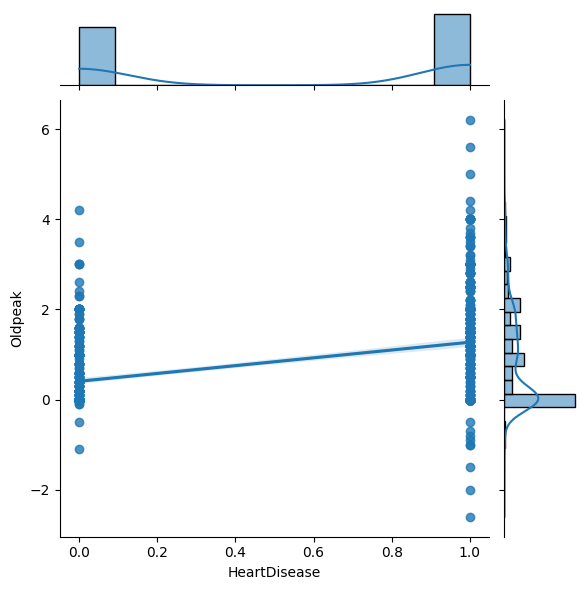

In [61]:
sns.jointplot(x = 'HeartDisease', y = 'Oldpeak', data = df, kind = 'reg')

In [62]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


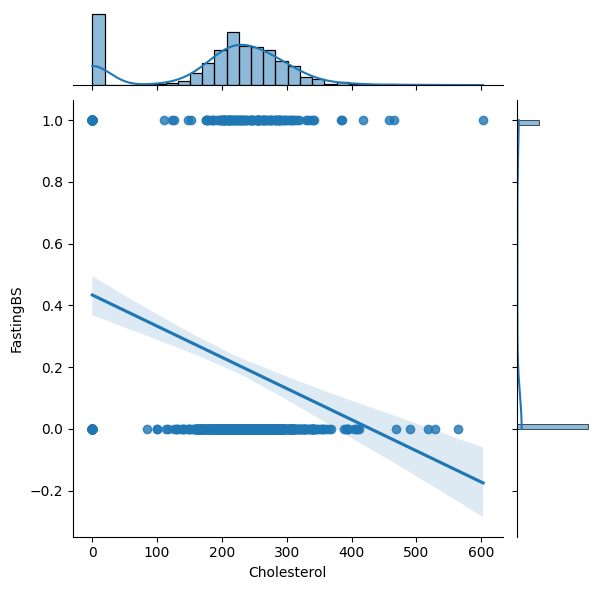

In [63]:
sns.jointplot(x = 'Cholesterol', y = 'FastingBS', data = df, kind = 'reg')

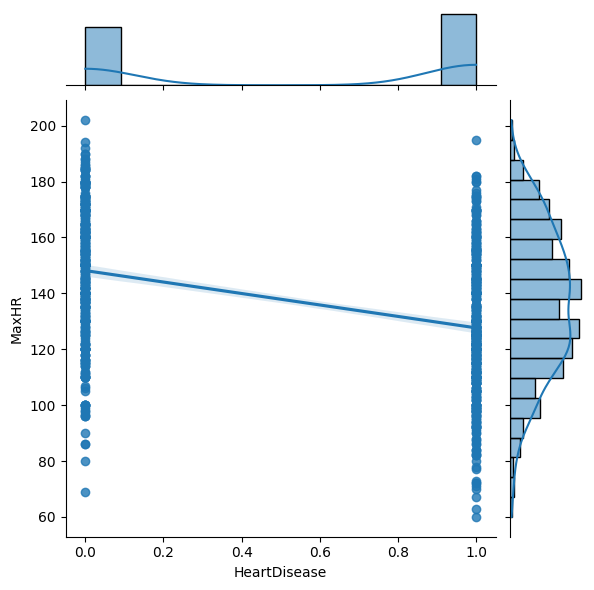

In [65]:
sns.jointplot(x = 'HeartDisease', y = 'MaxHR', data = df, kind = 'reg')

### Pair Plot

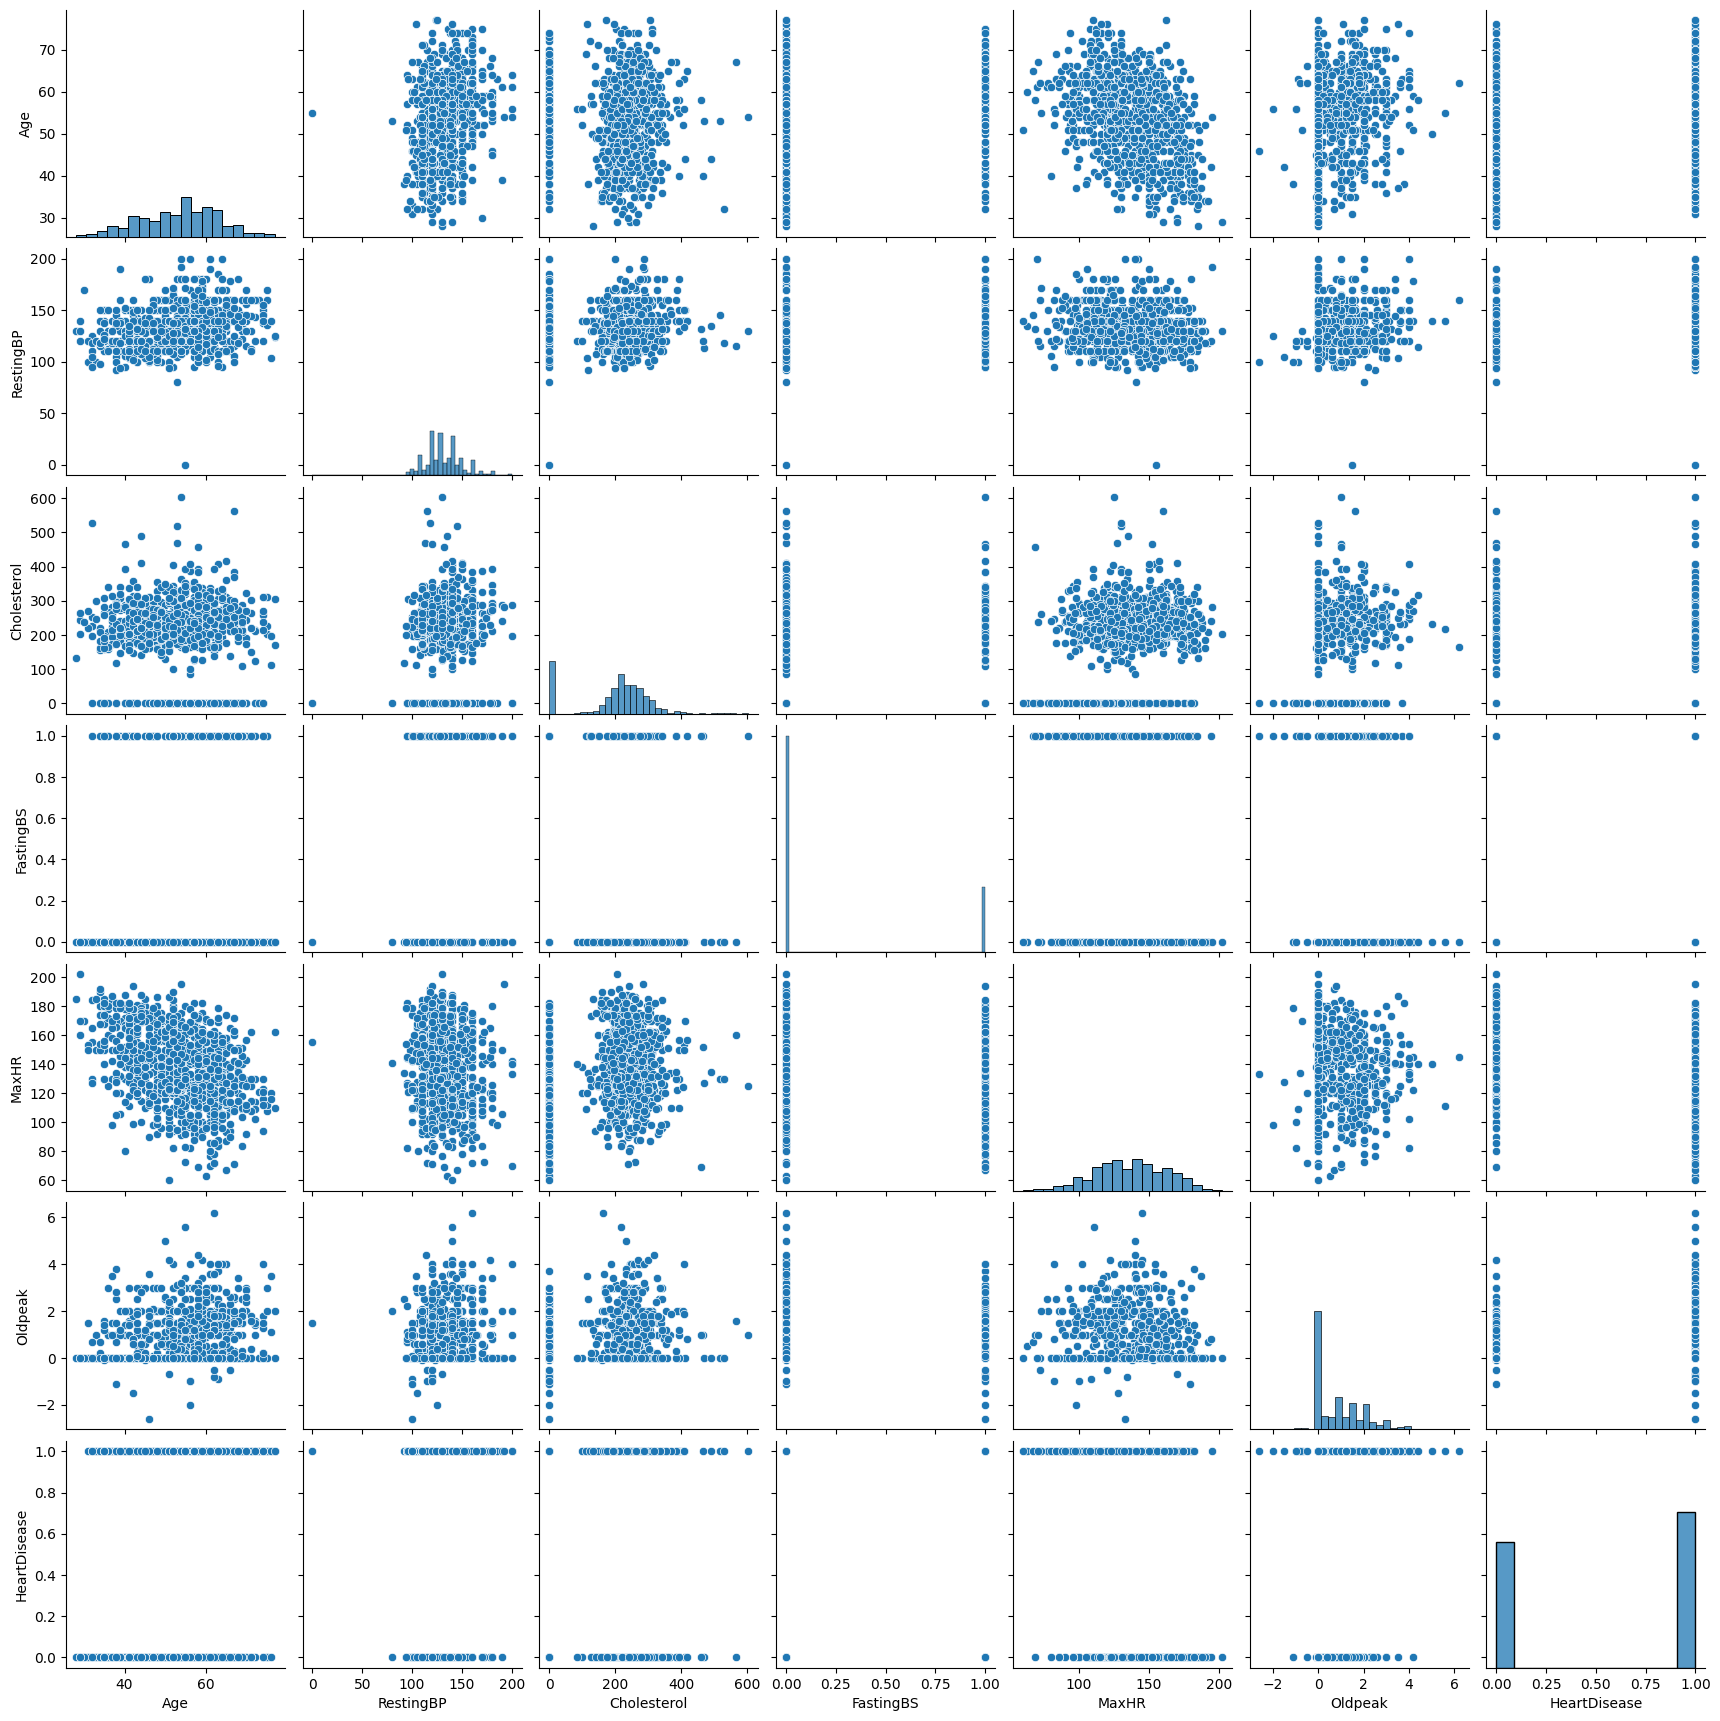

In [66]:
sns.pairplot(df)